✅ SVM Model Evaluation Results
--------------------------------
Accuracy: 0.4759

Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.64      0.57       717
           2       0.39      0.37      0.38       717
           3       0.44      0.38      0.41       717
           4       0.44      0.39      0.41       717
           5       0.56      0.59      0.58       717

    accuracy                           0.48      3585
   macro avg       0.47      0.48      0.47      3585
weighted avg       0.47      0.48      0.47      3585


Confusion Matrix:
 [[460 144  48  18  47]
 [207 264 139  60  47]
 [103 148 276 126  64]
 [ 60  82 116 280 179]
 [ 56  34  44 157 426]]


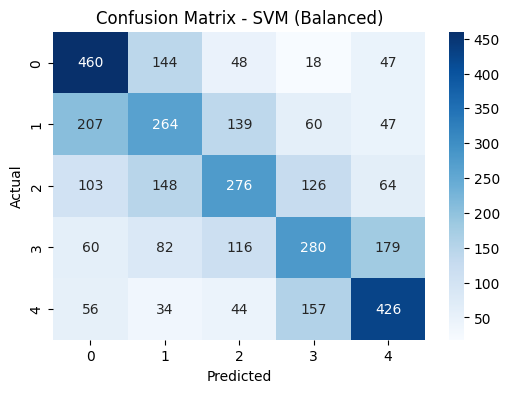

In [3]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X_test, y_test = joblib.load("models/balanced_test.pkl")


model = joblib.load("models/fine_tuned_svm_balanced.pkl")
vectorizer = joblib.load("models/vectorizer_B.pkl")

X_test_vec = vectorizer.transform(X_test)

y_pred = model.predict(X_test_vec)

print("✅ SVM Model Evaluation Results")
print("--------------------------------")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.5535535535535535

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.67      0.60       200
           2       0.44      0.43      0.43       300
           3       0.46      0.46      0.46       398
           4       0.51      0.50      0.51       500
           5       0.72      0.69      0.70       600

    accuracy                           0.55      1998
   macro avg       0.53      0.55      0.54      1998
weighted avg       0.56      0.55      0.55      1998



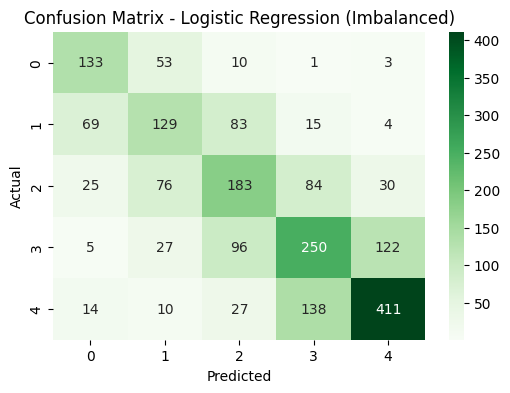

In [7]:
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


imbalanced_test = joblib.load("models/imbalanced_test.pkl")
X_test_imbal, y_test_imbal = imbalanced_test

model_A = joblib.load("models/fine_tuned_logistic_imbalanced.pkl")
vec_A = joblib.load("models/vectorizer_A.pkl")

X_vec_A = vec_A.transform(X_test_imbal)
y_pred = model_A.predict(X_vec_A)

print("Accuracy:", accuracy_score(y_test_imbal, y_pred))
print("\nClassification Report:\n", classification_report(y_test_imbal, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_imbal, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression (Imbalanced)")
plt.xlabel("Predicted"
plt.ylabel("Actual")
plt.show()


In [10]:
comparison = pd.DataFrame({
    "Logistic F1": df_A['f1-score'],
    "SVM F1": df_B['f1-score']
})
print(comparison.round(3))


   Logistic F1  SVM F1
1        0.596   0.574
2        0.434   0.380
3        0.459   0.412
4        0.506   0.412
5        0.703   0.576
